In [5]:
from coronavirus_analyzer import CoronavirusAnalyzer
from sklearn import preprocessing
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
first_date = '2020-01-17'
last_date = '2020-02-29'
in_english = True
mentioned_regions = ['Shanghai', 'Zhejiang', 'Beijing', 'Sichuan', 'Tianjin', 
                     'Jiangsu', 'Anhui', 'Henan', 'Heilongjiang']
analyzer = CoronavirusAnalyzer(last_date=last_date, first_date=first_date, in_english=in_english)

$ accumulated\_new_d = new_d + new_{d-1} + new_{d-2} $

$ risk_i = \sum_{j=0, j≠i}^n(population_j * 𝑎𝑐𝑐𝑢𝑚𝑢𝑙𝑎𝑡𝑒𝑑\_𝑛𝑒𝑤_j) $

$ processed\_risk_d = \sum_{w=0}^{window-1}risk_{d-w-offset} $

$ processed\_risk_{2020-02-11} = risk_{2020-02-08} + risk_{2020-02-07} $  (if offset =3, window = 2)

$ processed\_risk_d = risk_d $  (if offset =0, window = 1)

In [4]:
region = 'Hubei'
s_daily = analyzer.df_virus_daily_inc_injured[region]
s_cum = analyzer.get_df_virus_daily_inc_injured_cum_n(3, False)[region]
df = pd.DataFrame([s_daily, s_cum]).T.loc[:'2020-01-22']
df.columns = ['"new" in Hubei', '"accumulated new" in Hubei']
df

,"""new"" in Hubei","""accumulated new"" in Hubei"
date,,
2020-01-17,17,17
2020-01-18,59,76
2020-01-19,77,153
2020-01-20,72,208
2020-01-21,105,254
2020-01-22,69,246


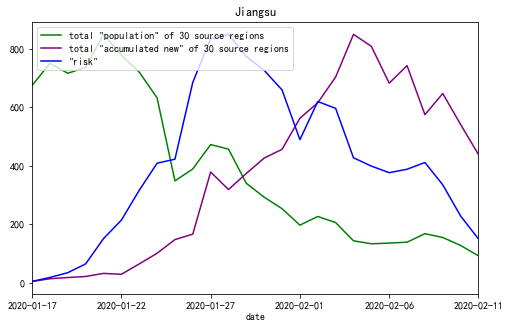

In [5]:
# figure 2
def plot_chart(region):
    s_population = analyzer.df_curve_in.loc['2020-01-17': '2020-02-11', region]
    s_risk = analyzer.df_move_in_risk.loc['2020-01-17': '2020-02-11', region]
    df_new = analyzer.df_virus_daily_inc_injured.loc['2020-01-17': '2020-02-11']
    del df_new[region]
    s_new = df_new.sum(axis=1)

    s_population *= s_risk.max() / s_population.max()
    s_new *= s_risk.max() / s_new.max()

    s_population.plot(color='g', label='total "population" of 30 source regions', figsize=(8, 5))
    s_new.plot(color='purple', label='total "accumulated new" of 30 source regions', figsize=(8, 5))
    s_risk.plot(color='b', label='"risk"', figsize=(8, 5))
    analyzer.plt.title(region)
    analyzer.plt.legend(loc='upper left')
    analyzer.plt.show()
plot_chart('Jiangsu')

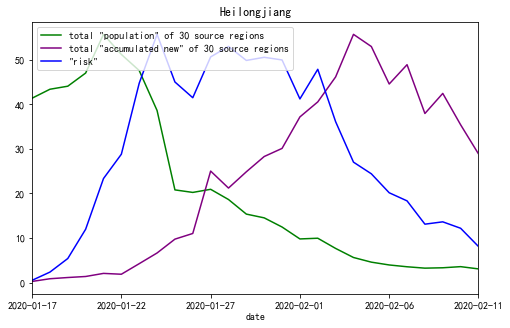

In [6]:
# figure 3
plot_chart('Heilongjiang')

## Data 1: daily new diagnosed in each region

regions sorted by the mean value of "new"

(including Hubei)

In [7]:
df_virus_daily_inc_injured = analyzer.df_virus_daily_inc_injured
sorted_regions = df_virus_daily_inc_injured.mean().sort_values(ascending=False).index
df_virus_daily_inc_injured[sorted_regions]

,Hubei,Guangdong,Henan,Zhejiang,Hunan,Anhui,Jiangxi,Shandong,Jiangsu,Chongqing,Sichuan,Heilongjiang,Beijing,Shanghai,Hebei,Fujian,Guangxi,Shaanxi,Yunnan,Hainan,Guizhou,Tianjin,Shanxi,Liaoning,Jilin,Gansu,Xinjiang,Neimenggu,Ningxia,Qinghai,Xizang
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-18,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-19,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-20,72,16,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-21,105,9,1,5,0,0,2,0,0,5,0,0,5,8,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2020-01-22,69,6,3,5,0,9,1,0,1,4,7,0,4,7,1,1,2,0,0,4,0,2,1,2,0,0,0,0,0,0,0
2020-01-23,105,21,5,33,24,6,4,9,8,18,8,4,12,4,1,2,11,3,0,4,3,1,0,1,3,2,2,1,2,0,0
2020-01-24,180,25,23,19,19,24,11,12,9,30,13,5,10,13,6,15,10,2,5,9,1,3,5,9,1,2,1,1,1,0,0
2020-01-25,323,33,51,42,26,21,18,18,13,18,16,6,15,7,5,11,10,17,6,2,1,2,3,7,0,3,1,3,1,1,0


## Data 2: daily incoming immigration population size in each region

regions sorted by the mean value of "size"

(excluding Hubei)

In [8]:
df_curve_in = analyzer.df_curve_in
sorted_regions = df_curve_in.mean().sort_values(ascending=False).index
df_curve_in[sorted_regions]

,Guangdong,Jiangsu,Anhui,Henan,Zhejiang,Hebei,Hunan,Sichuan,Beijing,Guangxi,Jiangxi,Shanghai,Shandong,Chongqing,Guizhou,Hubei,Shaanxi,Fujian,Yunnan,Shanxi,Liaoning,Tianjin,Neimenggu,Gansu,Heilongjiang,Jilin,Hainan,Ningxia,Qinghai,Xinjiang,Xizang
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-17,7.479702,12.567247,19.064387,20.305274,6.714187,11.821172,18.812995,13.799840,7.910266,15.205417,16.720052,6.046294,8.829421,8.361760,8.927593,12.762911,5.799600,4.881481,4.959209,4.185173,3.440815,2.927113,2.845368,3.189132,3.271331,2.588339,1.565503,0.885298,0.534211,0.606820,0.128012
2020-01-18,7.784878,13.981799,22.622846,20.479068,7.226885,13.868982,20.171819,15.186172,7.295508,15.242159,18.286981,5.728968,9.426974,9.015300,9.102294,13.375660,5.866085,5.531328,5.075881,4.458532,3.554636,3.224189,3.021527,3.447425,3.430156,2.666650,1.659496,0.947927,0.500936,0.615794,0.121014
2020-01-19,7.810182,13.344588,23.948784,21.616405,6.797326,13.308008,19.694178,15.184357,7.676370,17.443674,18.350420,5.616346,10.418998,8.616035,8.307392,13.805543,6.180073,5.599498,5.076432,4.848206,3.711517,2.832343,3.112733,3.597728,3.484134,2.745252,1.867309,0.918637,0.487328,0.611032,0.124740
2020-01-20,7.853468,13.721400,24.634271,23.214892,6.784430,14.444114,21.407749,15.983212,7.020335,17.749109,16.788708,5.336377,11.019694,9.133074,8.469328,14.511863,6.541398,5.630731,5.169647,5.219251,3.919493,2.769714,3.280435,3.882816,3.717641,2.970497,2.047648,0.952819,0.473494,0.616864,0.113854
2020-01-21,9.471946,15.827854,28.747516,26.102736,7.728113,17.368571,22.654534,18.145555,7.075512,17.402947,17.720240,5.228096,13.438937,10.562724,8.914763,16.044577,7.254036,6.170353,5.624024,6.135361,4.796658,3.017671,3.894901,4.654649,4.404229,3.528490,2.299784,1.040526,0.514706,0.656100,0.122310
2020-01-22,8.995601,14.501138,24.880414,20.748409,6.911762,17.404956,16.789972,15.364080,5.902438,12.798583,14.143280,4.306705,12.173846,8.748518,6.798557,12.086237,6.245456,5.429689,4.744591,5.604649,4.589525,2.747358,3.691624,4.277610,4.047894,3.404754,2.102274,0.936976,0.470837,0.597488,0.121792
2020-01-23,8.448980,13.420242,21.878456,17.884897,6.574252,17.591256,13.163893,14.352908,4.839199,9.846652,11.299079,3.733970,11.559154,7.923517,5.730977,8.887417,5.688436,4.815094,4.293130,5.257742,4.231537,2.418692,3.454326,4.154620,3.761802,3.296214,2.031869,0.828954,0.443167,0.556600,0.123703
2020-01-24,6.701584,11.781936,17.378874,14.460638,6.203077,13.714337,9.278388,11.957220,3.716215,6.863519,8.061120,2.867886,9.627984,6.735247,4.335347,5.143111,4.600217,4.018410,3.606120,4.372672,3.585967,1.860311,2.709482,3.389137,3.053117,2.695356,1.798589,0.740567,0.423760,0.472003,0.113627
2020-01-25,4.338328,6.485216,8.598604,7.076678,3.399602,6.597482,4.441262,7.145885,2.549426,3.270035,3.643607,1.950448,4.728683,4.375361,2.789899,1.977858,2.690431,1.872688,2.366042,2.189884,1.961917,1.258092,1.697598,1.913674,1.644138,1.590386,1.164326,0.515905,0.343796,0.386208,0.083106


## Data 3: daily immigration risk in each region

regions sorted by the mean value of "risk"

(excluding Hubei)

In [9]:
df_move_in_risk = analyzer.df_move_in_risk
sorted_regions = df_move_in_risk.mean().sort_values(ascending=False).index
df_move_in_risk[sorted_regions]

,Guangdong,Hunan,Henan,Chongqing,Jiangsu,Shanghai,Anhui,Sichuan,Jiangxi,Zhejiang,Beijing,Guangxi,Shaanxi,Hebei,Shandong,Fujian,Shanxi,Guizhou,Yunnan,Tianjin,Hubei,Liaoning,Gansu,Jilin,Neimenggu,Hainan,Heilongjiang,Xinjiang,Ningxia,Qinghai,Xizang
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-17,5.912704,12.824819,15.050269,6.865841,3.738756,1.572641,5.477198,3.612798,6.992326,2.910600,1.976775,1.654349,3.125404,2.089983,2.521683,2.406570,1.052989,1.623929,1.155000,0.308518,0.000000,0.707776,0.731906,0.365215,0.295065,0.657355,0.500514,0.235203,0.115885,0.080826,0.026985
2020-01-18,26.683446,64.848363,69.727131,32.476717,17.533176,20.638034,26.821647,17.196821,31.965643,13.786005,7.873312,6.834584,15.514621,10.224214,11.678136,10.803790,4.947187,7.194453,5.130701,1.543742,0.000000,2.998691,3.275054,1.519990,1.217071,3.014308,2.346226,1.577173,0.641178,0.430204,0.110365
2020-01-19,57.596968,139.716407,147.892959,64.650417,33.696419,12.327879,52.577160,42.305138,76.442346,27.304177,15.156225,31.321861,32.431788,20.556881,23.784488,24.206068,10.670417,16.507619,11.488981,3.038538,4.105768,6.663658,7.136094,3.414270,2.856244,7.315371,5.395181,2.251102,1.354255,0.704141,0.174673
2020-01-20,86.908837,418.470118,293.289976,129.604713,63.785300,20.349207,104.515821,115.937422,214.277638,50.595568,23.491444,280.357823,59.533263,66.604700,49.854196,62.281518,24.593634,56.894402,35.315925,7.919997,78.517885,14.863893,14.648700,8.105595,8.072167,20.829286,11.965970,4.297935,2.273808,1.314797,0.369022
2020-01-21,144.275728,656.353944,491.639812,206.888906,150.230072,33.679397,238.495139,214.719984,341.057923,89.840857,37.155636,408.944895,95.820012,138.556037,101.738127,104.784938,46.561870,98.570532,57.374047,14.438048,160.296557,29.459155,26.628780,16.355961,16.586826,34.506655,23.347700,7.101233,3.750264,2.112870,0.519292
2020-01-22,152.845153,592.773305,495.436739,209.037099,213.484309,41.936111,294.146202,212.204064,335.188674,102.668701,43.057102,349.246459,98.521450,188.561812,125.372357,111.384644,56.896717,90.763453,60.713687,20.251875,153.825162,35.771674,29.995885,20.761849,22.604550,36.977318,28.806433,7.636858,4.352439,2.735279,0.895034
2020-01-23,235.210320,607.734825,618.334551,261.547379,315.562228,85.104653,500.651281,342.035548,413.792604,138.758784,62.097572,328.807268,127.807771,294.479385,188.848828,147.471872,84.940406,137.872974,90.792822,30.273563,194.550006,54.050694,47.681323,33.501730,34.422359,49.495308,44.746635,11.245483,6.597562,4.590680,1.849833
2020-01-24,308.513432,601.415832,606.471944,310.182380,408.305348,111.166718,555.618243,457.338555,413.902237,200.936280,90.958455,326.444054,155.072388,310.411671,237.115102,168.467821,97.789990,162.559464,116.409520,38.845336,176.804219,65.990044,56.819902,46.867120,41.666691,61.254539,55.714497,13.484707,10.002540,6.371776,2.717612
2020-01-25,605.991482,645.549925,542.152117,223.698197,422.050101,157.995618,481.943993,426.988769,357.303014,241.880011,134.446806,243.586200,187.449337,241.194720,214.186160,139.799875,88.331364,169.868872,106.192242,48.303813,111.272511,53.967634,58.119415,41.248421,37.940976,60.928618,45.023404,17.008446,12.126816,8.690314,3.025989


## model output result

The NaN values indicate that there were no diagnosed people in the regions on that day. The calculation results are available from the first day when the number of newly diagnosed people is not zero.

The regions are sorted by the values of "offset + window" in 14 Feb.

In [10]:
df_move_inc_corr = analyzer.df_move_inc_corr
s_offset = df_move_inc_corr.loc['2020-02-11'][2::4]
s_window = df_move_inc_corr.loc['2020-02-11'][3::4]
sorted_regions = df_move_inc_corr.columns.levels[0].values[np.argsort(s_offset.values + s_window.values)]
df_move_inc_corr = df_move_inc_corr[sorted_regions]
del df_move_inc_corr['Hubei']
df_move_inc_corr

Shanghai                            Qinghai                    \
                corr corr delta offset window      corr corr delta offset   
2020-01-17       NaN        NaN    NaN    NaN       NaN        NaN    NaN   
2020-01-18       NaN        NaN    NaN    NaN       NaN        NaN    NaN   
2020-01-19       NaN        NaN    NaN    NaN       NaN        NaN    NaN   
2020-01-20  1.000000   0.507367    3.0    1.0       NaN        NaN    NaN   
2020-01-21  0.998789   0.210157    3.0    1.0       NaN        NaN    NaN   
2020-01-22  0.975092   0.114766    3.0    1.0       NaN        NaN    NaN   
2020-01-23  0.875797   0.337711    3.0    1.0       NaN        NaN    NaN   
2020-01-24  0.940807   0.146372    3.0    1.0       NaN        NaN    NaN   
2020-01-25  0.833522   0.156431    3.0    1.0  1.000000   0.280965    8.0   
2020-01-26  0.832341   0.092453    3.0    2.0  0.994995   0.103866    7.0   
2020-01-27  0.830059   0.071190    6.0    1.0  0.905532   0.047131    5.0   
2020-01-28  0.841183   0.052568    6.0    1.0  0.583131   0.000000    0.0   
2020-01-29  0.873984   0.012525    6.0    1.0  0.434434   0.000000    0.0   
2020-01-30  0.922925   0.021221    6.0    1.0  0.515695   0.000000    0.0   
2020-01-31  0.930131   0.009771    0.0    4.0  0.514544   0.000000    0.0   
2020-02-01  0.938151   0.016057    0.0    4.0  0.472478   0.000000    0.0   
2020-02-02  0.924102   0.021547    1.0    1.0  0.580662   0.112383    7.0   
2020-02-03  0.897889   0.011127    0.0    2.0  0.578586   0.084602    6.0   
2020-02-04  0.904921   0.031307    1.0    1.0  0.597198   0.104456    6.0   
2020-02-05  0.906931   0.032411    0.0    3.0  0.559343   0.067878    6.0   
2020-02-06  0.903362   0.031909    0.0    3.0  0.496007   0.001211    0.0   
2020-02-07  0.888820   0.030485    0.0    3.0  0.497183   0.000000    0.0   
2020-02-08  0.869338   0.037199    1.0    1.0  0.499039   0.000000    0.0   
2020-02-09  0.785775   0.029803    0.0    3.0  0.507021   0.000000    0.0   
2020-02-10  0.753200   0.007857    0.0    3.0  0.509212   0.000000    0.0   
2020-02-11  0.747769   0.000000    0.0    1.0  0.516061   0.000000    0.0   
2020-02-12  0.750420   0.000000    0.0    1.0  0.520916   0.000000    0.0   
2020-02-13  0.750960   0.000000    0.0    1.0  0.521267   0.000000    0.0   
2020-02-14  0.752114   0.000000    0.0    1.0  0.528218   0.000000    0.0   
2020-02-15  0.759029   0.000000    0.0    1.0  0.535706   0.000000    0.0   
2020-02-16  0.767033   0.000000    0.0    1.0  0.542300   0.000000    0.0   
2020-02-17  0.775634   0.000000    0.0    1.0  0.548532   0.000000    0.0   
2020-02-18  0.784167   0.000000    0.0    1.0  0.554156   0.000000    0.0   
2020-02-19  0.792798   0.000000    0.0    1.0  0.559287   0.000000    0.0   
2020-02-20  0.799375   0.000000    0.0    1.0  0.564077   0.000000    0.0   
2020-02-21  0.805806   0.000000    0.0    1.0  0.568451   0.000000    0.0   
2020-02-22  0.810867   0.000000    0.0    1.0  0.572544   0.000000    0.0   
2020-02-23  0.816304   0.000000    0.0    1.0  0.576076   0.000000    0.0   
2020-02-24  0.821424   0.000000    0.0    1.0  0.579288   0.000000    0.0   
2020-02-25  0.825450   0.000000    0.0    1.0  0.582496   0.000000    0.0   
2020-02-26  0.829084   0.000000    0.0    1.0  0.585509   0.000000    0.0   
2020-02-27  0.833260   0.000000    0.0    1.0  0.588144   0.000000    0.0   
2020-02-28  0.837137   0.000000    0.0    1.0  0.590539   0.000000    0.0   
2020-02-29  0.840692   0.000000    0.0    1.0  0.592767   0.000000    0.0   

                   Liaoning                             Xizang             \
           window      corr corr delta offset window      corr corr delta   
2020-01-17    NaN       NaN        NaN    NaN    NaN       NaN        NaN   
2020-01-18    NaN       NaN        NaN    NaN    NaN       NaN        NaN   
2020-01-19    NaN       NaN        NaN    NaN    NaN       NaN        NaN   
2020-01-20    NaN       NaN        NaN    NaN    NaN       NaN        NaN   
2020-01

In [11]:
# table 3
df = df_move_inc_corr.loc[['2020-01-21', '2020-01-24', '2020-01-27', '2020-01-30', '2020-02-02', 
                           '2020-02-05', '2020-02-08', '2020-02-11'], mentioned_regions]
cols = np.array([2, 3])
idx = []
for i in range(len(mentioned_regions)):
    idx += (cols + i * 4).tolist()
df = df.iloc[:, idx].astype(object)
for i, row in enumerate(df.values):
    for j, val in enumerate(row):
        if ~np.isnan(val):
            df.iloc[i, j] = int(val)
df

Shanghai        Zhejiang        Beijing        Tianjin         \
             offset window   offset window  offset window  offset window   
2020-01-21        3      1        4      1       1      2       4      1   
2020-01-24        3      1        2      1       2      1       1      1   
2020-01-27        6      1        2      1       4      2       1      1   
2020-01-30        6      1        2      1       0      1       0      1   
2020-02-02        1      1        1      2       0      8       6      1   
2020-02-05        0      3        1      2       1      4       6      1   
2020-02-08        1      1        1      3       1      3       6      1   
2020-02-11        0      1        1      3       0      5       6      2   

           Sichuan        Jiangsu         Anhui         Henan         \
            offset window  offset window offset window offset window   
2020-01-21     NaN    NaN     NaN    NaN    NaN    NaN      4      1   
2020-01-24       1      4       2      1      3      2      6      7   
2020-01-27       2      1       1      4      0     10      4      1   
2020-01-30       0     10       1      4      4      2      2     10   
2020-02-02       1      6       0      6      2     10      2     10   
2020-02-05       1      6       0      7      3     10      4     10   
2020-02-08       1      6       0      8      3     10      3     10   
2020-02-11       1      7       0      9      3     10      3     10   

           Heilongjiang         
                 offset window  
2020-01-21          NaN    NaN  
2020-01-24            2      5  
2020-01-27            0     10  
2020-01-30            0     10  
2020-02-02            3     10  
2020-02-05            6     10  
2020-02-08            4     10  
2020-02-11            4     10

In [12]:
analyzer.df_virus_daily_injured.loc[['2020-02-11'], ['Shanghai', 'Beijing', 'Tianjin']]

,Shanghai,Beijing,Tianjin
date,,,
2020-02-11,306,352,106


In [13]:
# table 2
columns = pd.MultiIndex.from_product([
    ['Shanghai total diagnosed count', 'Beijing total diagnosed count', 'Tianjin total diagnosed count'], 
    ['incomming immigrants', 'inner citizens', 'inner diagnosed rate(%)']])
pd.DataFrame([
    [99, 306-99, (306-99)/306*100, 25, 352, 352/(25+352)*100, 6, 106, 106/(6+106)*100],
#     [111, 225, 225/(111+225)*100, 25, 375, 375/(25+375)*100, 6, 129, 129/(6+129)*100]
], columns=columns, index=['until 2020-02-11'])  # , 'until 2020-02-25'

Shanghai total diagnosed count                 \
                           incomming immigrants inner citizens   
until 2020-02-11                             99            207   

                                         Beijing total diagnosed count  \
                 inner diagnosed rate(%)          incomming immigrants   
until 2020-02-11               67.647059                            25   

                                                         \
                 inner citizens inner diagnosed rate(%)   
until 2020-02-11            352                 93.3687   

                 Tianjin total diagnosed count                 \
                          incomming immigrants inner citizens   
until 2020-02-11                             6            106   

                                          
                 inner diagnosed rate(%)  
until 2020-02-11               94.642857

In [14]:
df_move_inc_corr.loc['2020-02-23': '2020-02-25', ['Shanghai', 'Beijing', 'Tianjin']]

Shanghai                            Beijing                    \
                corr corr delta offset window      corr corr delta offset   
2020-02-23  0.816304        0.0    0.0    1.0  0.823558   0.187499    0.0   
2020-02-24  0.821424        0.0    0.0    1.0  0.828202   0.183325    0.0   
2020-02-25  0.825450        0.0    0.0    1.0  0.832886   0.179187    0.0   

                    Tianjin                           
           window      corr corr delta offset window  
2020-02-23    4.0  0.622900   0.057816    0.0    9.0  
2020-02-24    4.0  0.631152   0.054705    0.0    9.0  
2020-02-25    4.0  0.639133   0.052417    0.0    9.0

In [15]:
# table 3
df_move_inc_corr = analyzer.df_move_inc_corr.loc[['2020-02-10']]
# R0 data is from reference
r0 = {'Shanghai': 0.46, 'Zhejiang': 0.52, 'Jiangsu': 0.82, 'Anhui': 0.98, 'Henan': 0.75, 'Sichuan': 0.81}
regions = list(r0)
# df = df_move_inc_corr[list(r0)]
# df_r0 = pd.DataFrame([r0], index=df.index)
# df_r0.columns = pd.MultiIndex.from_product([df_r0.columns, ['R0']])
# df = pd.concat([df_r0, df_move_inc_corr[list(r0)]], axis=1, sort=False).sort_index(axis=1)[regions]
# df_mean = pd.DataFrame(df.iloc[:, 2::4].values + df.iloc[:, 3::4].values, 
#                        index=df.index, columns=pd.MultiIndex.from_product([regions, ['offset + window']]))
# df = pd.concat([df.iloc[:, 0::4], df_mean, ], axis=1).sort_index(axis=1)  # df.iloc[:, 2::4], df.iloc[:, 3::4]
# df[['Shanghai', 'Zhejiang', 'Sichuan', 'Jiangsu', 'Henan', 'Anhui']]
df = pd.DataFrame([r0])
df[['Shanghai', 'Zhejiang', 'Sichuan', 'Jiangsu', 'Henan', 'Anhui']]

,Shanghai,Zhejiang,Sichuan,Jiangsu,Henan,Anhui
0,0.46,0.52,0.81,0.82,0.75,0.98


In [16]:
max_risk = {}
mean_risk = {}
min_risk = {}
max_risk_date = {}
min_risk_date = {}
for region in mentioned_regions:
    s_risk = analyzer.df_move_in_risk.loc['2020-01-17': '2020-02-11', region]
    max_risk[region] = s_risk.max()
    mean_risk[region] = s_risk.mean()
    min_risk[region] = s_risk.min()
    max_risk_date[region] = s_risk.index[s_risk.values - max_risk[region] == 0][0]
    min_risk_date[region] = s_risk.index[s_risk.values - min_risk[region] == 0][0]
pd.DataFrame([max_risk, mean_risk, min_risk, min_risk_date, max_risk_date], 
             index=['max "risk"', 'mean "risk"', 'min "risk"', 'min "risk" date', 'max "risk" date'])[mentioned_regions]

,Shanghai,Zhejiang,Beijing,Sichuan,Tianjin,Jiangsu,Anhui,Henan,Heilongjiang
"max ""risk""",713.653,506.8,1088.43,511.465,231.437,849.314,555.618,618.335,55.7145
"mean ""risk""",377.882,225.016,248.339,246.526,76.8706,406.571,272.025,429.443,29.8276
"min ""risk""",1.57264,2.9106,1.97678,3.6128,0.308518,3.73876,5.4772,15.0503,0.500514
"min ""risk"" date",2020-01-17,2020-01-17,2020-01-17,2020-01-17,2020-01-17,2020-01-17,2020-01-17,2020-01-17,2020-01-17
"max ""risk"" date",2020-01-30,2020-01-27,2020-02-03,2020-01-26,2020-02-04,2020-01-28,2020-01-24,2020-01-23,2020-01-24


## Plot "new" and "risk" in all 30 regions under offset=0, window=1

## And plot "new" and "processed risk" under best fit by the maximize the "corr" 

total 60 figures, regions are sorted by effectiveness from best to worst.

In [24]:
last_date = '2020-02-11'
analyzer = CoronavirusAnalyzer(last_date=last_date, first_date='2020-01-17', in_english=True)

offset = 0, window = 1, corr = 0.5160606078898728


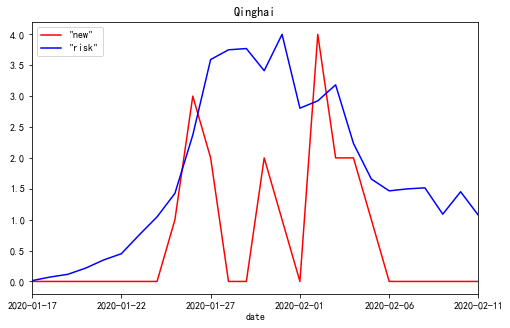

In [25]:
analyzer.plot_move_inc_corr('Qinghai', use_best_fit=False)

offset = 0, window = 1, corr = 0.5160606078898728


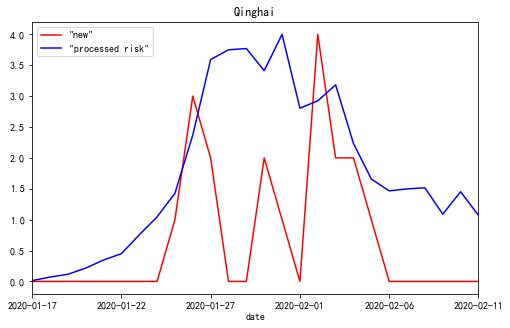

In [26]:
analyzer.plot_move_inc_corr('Qinghai', use_best_fit=True)

offset = 0, window = 1, corr = 0.7477691282696345


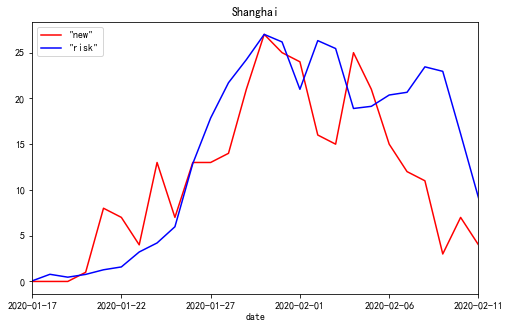

In [27]:
analyzer.plot_move_inc_corr('Shanghai', use_best_fit=False)

offset = 0, window = 1, corr = 0.7477691282696345


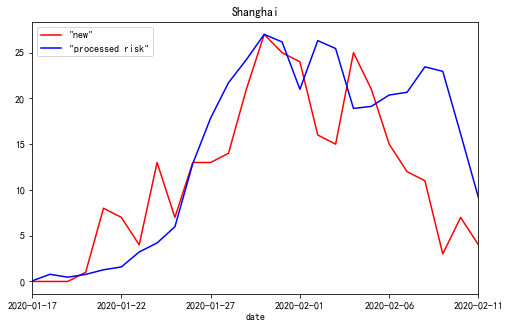

In [28]:
analyzer.plot_move_inc_corr('Shanghai', use_best_fit=True)

offset = 0, window = 1, corr = 0.6770451612410725


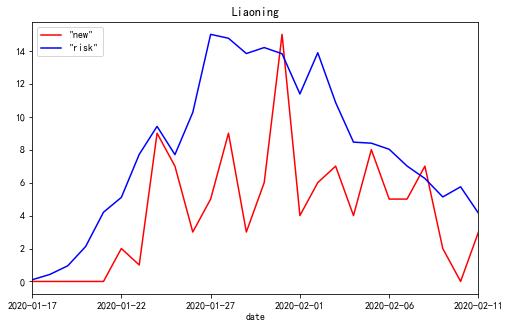

In [29]:
analyzer.plot_move_inc_corr('Liaoning', use_best_fit=False)

offset = 1, window = 1, corr = 0.7207829657404504


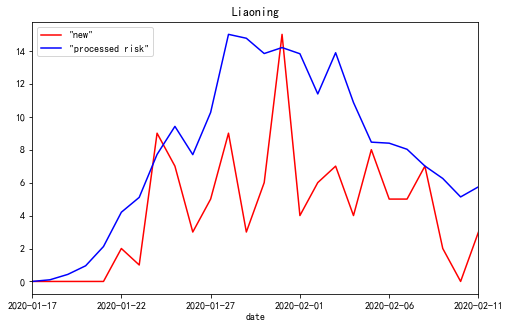

In [30]:
analyzer.plot_move_inc_corr('Liaoning', use_best_fit=True)

offset = 0, window = 1, corr = 0.2353077695414271


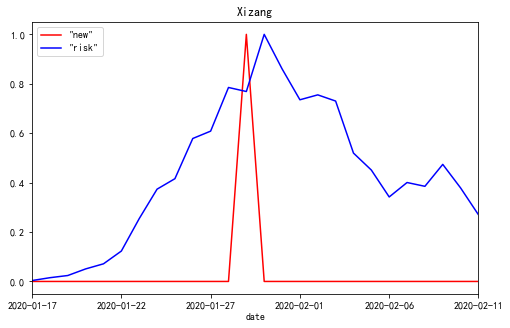

In [31]:
analyzer.plot_move_inc_corr('Xizang', use_best_fit=False)

offset = 1, window = 1, corr = 0.24493238818539234


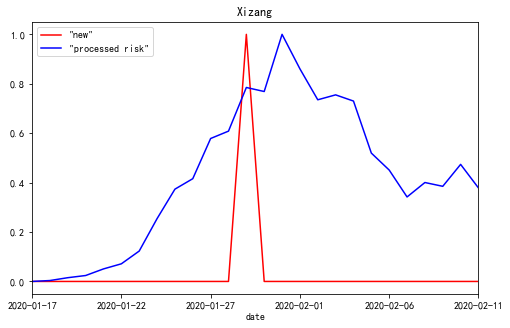

In [32]:
analyzer.plot_move_inc_corr('Xizang', use_best_fit=True)

offset = 0, window = 1, corr = 0.7673646826509236


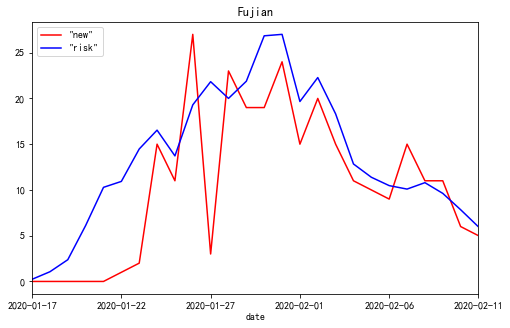

In [33]:
analyzer.plot_move_inc_corr('Fujian', use_best_fit=False)

offset = 0, window = 3, corr = 0.8046008415533149


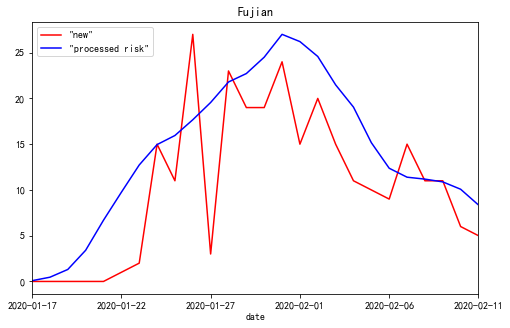

In [34]:
analyzer.plot_move_inc_corr('Fujian', use_best_fit=True)

offset = 0, window = 1, corr = 0.6601123386102973


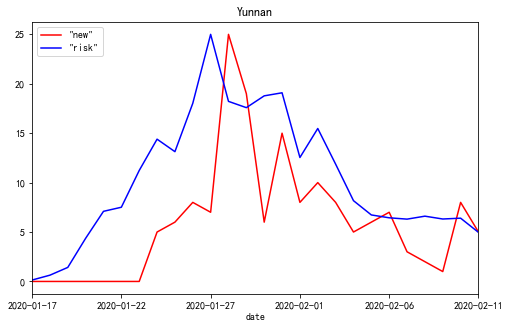

In [35]:
analyzer.plot_move_inc_corr('Yunnan', use_best_fit=False)

offset = 1, window = 2, corr = 0.8320089333919763


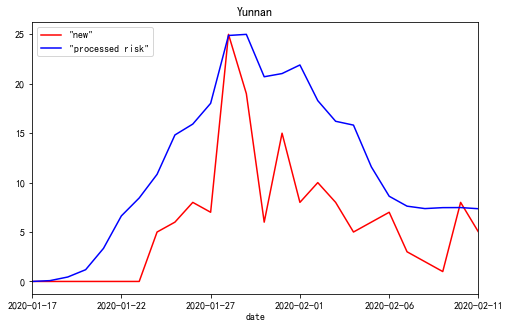

In [36]:
analyzer.plot_move_inc_corr('Yunnan', use_best_fit=True)

offset = 0, window = 1, corr = 0.7481007520525306


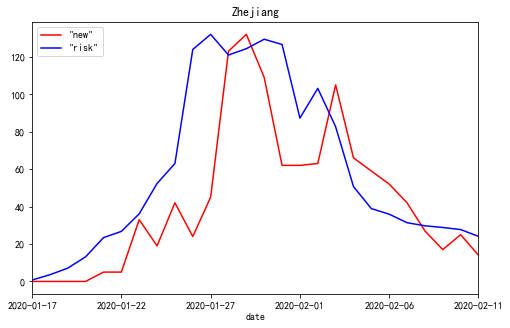

In [37]:
analyzer.plot_move_inc_corr('Zhejiang', use_best_fit=False)

offset = 1, window = 3, corr = 0.8882597508817133


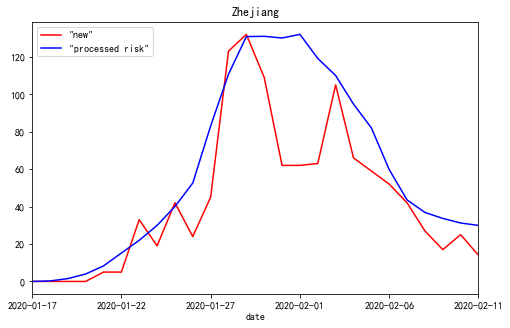

In [38]:
analyzer.plot_move_inc_corr('Zhejiang', use_best_fit=True)

offset = 0, window = 1, corr = 0.5529875974557777


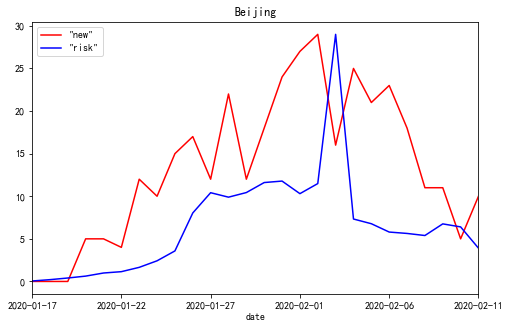

In [39]:
analyzer.plot_move_inc_corr('Beijing', use_best_fit=False)

offset = 0, window = 5, corr = 0.8078879832688707


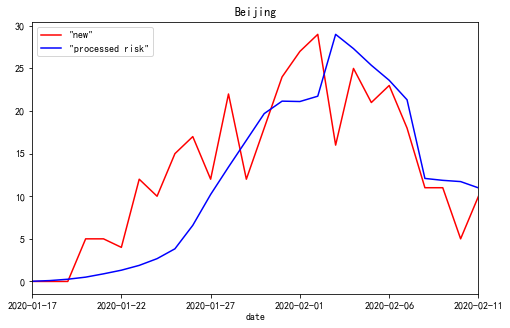

In [40]:
analyzer.plot_move_inc_corr('Beijing', use_best_fit=True)

offset = 0, window = 1, corr = 0.693023695871494


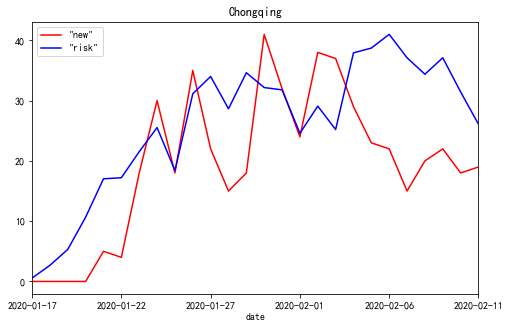

In [41]:
analyzer.plot_move_inc_corr('Chongqing', use_best_fit=False)

offset = 3, window = 2, corr = 0.7153797460021183


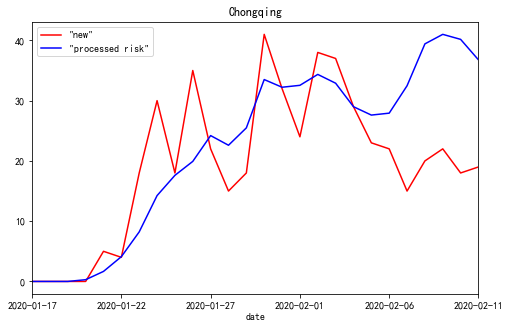

In [42]:
analyzer.plot_move_inc_corr('Chongqing', use_best_fit=True)

offset = 0, window = 1, corr = 0.7206600345174448


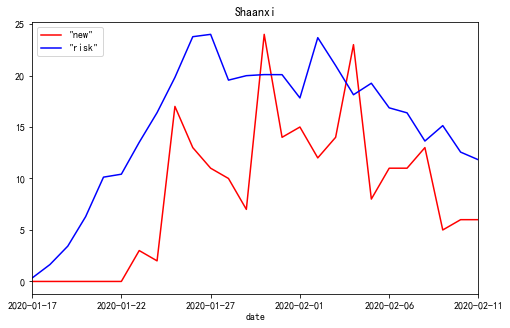

In [43]:
analyzer.plot_move_inc_corr('Shaanxi', use_best_fit=False)

offset = 0, window = 6, corr = 0.7902919861777367


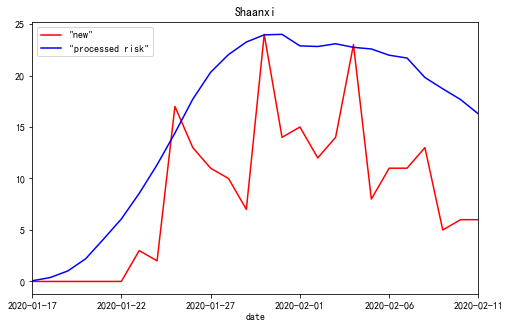

In [44]:
analyzer.plot_move_inc_corr('Shaanxi', use_best_fit=True)

offset = 0, window = 1, corr = 0.6395545857715658


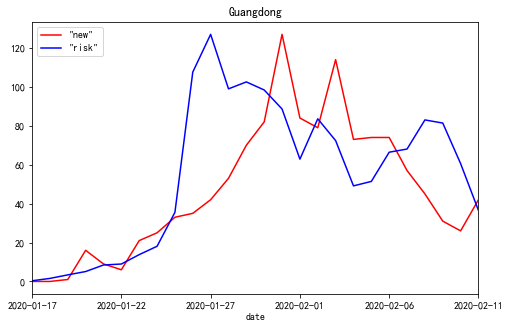

In [45]:
analyzer.plot_move_inc_corr('Guangdong', use_best_fit=False)

offset = 0, window = 6, corr = 0.8837047463588393


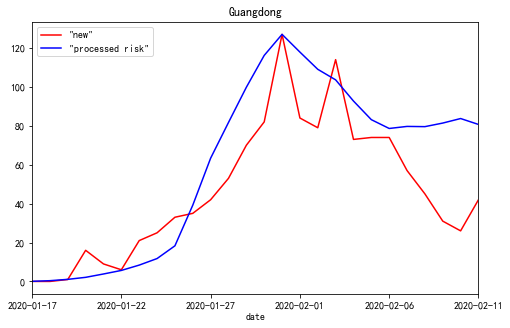

In [46]:
analyzer.plot_move_inc_corr('Guangdong', use_best_fit=True)

offset = 0, window = 1, corr = 0.2850731393712041


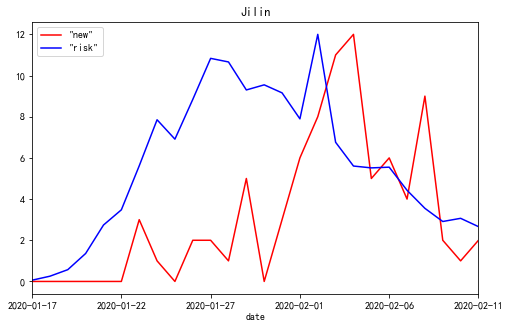

In [47]:
analyzer.plot_move_inc_corr('Jilin', use_best_fit=False)

offset = 6, window = 1, corr = 0.8013334240920934


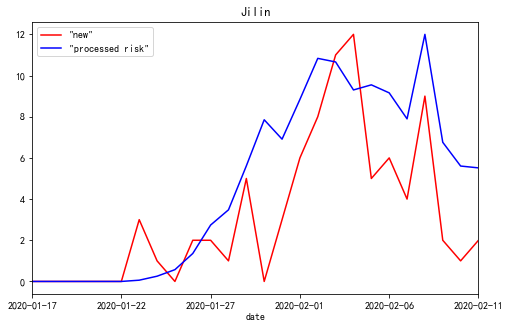

In [48]:
analyzer.plot_move_inc_corr('Jilin', use_best_fit=True)

offset = 0, window = 1, corr = 0.45370108030042283


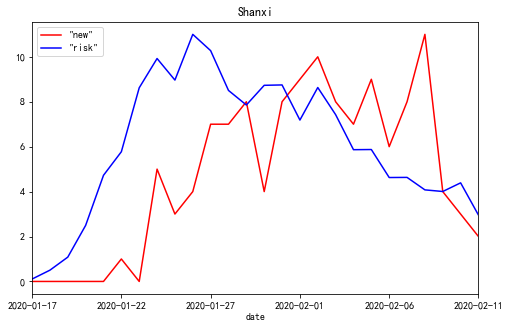

In [49]:
analyzer.plot_move_inc_corr('Shanxi', use_best_fit=False)

offset = 0, window = 10, corr = 0.8764966070906736


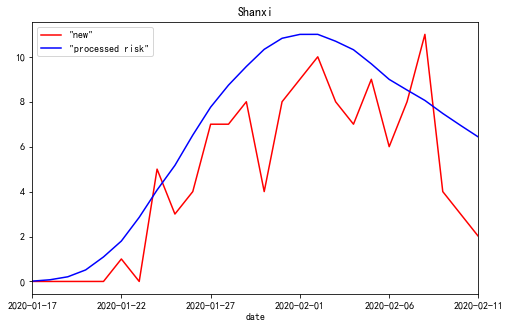

In [50]:
analyzer.plot_move_inc_corr('Shanxi', use_best_fit=True)

offset = 0, window = 1, corr = 0.5177693495351221


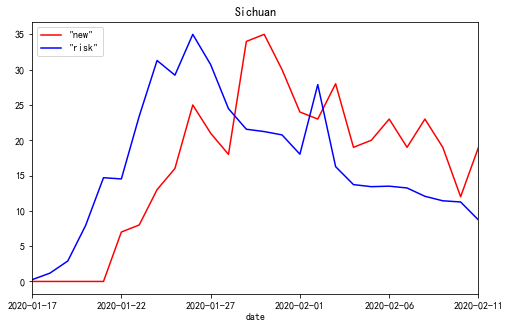

In [51]:
analyzer.plot_move_inc_corr('Sichuan', use_best_fit=False)

offset = 1, window = 7, corr = 0.9402355751439356


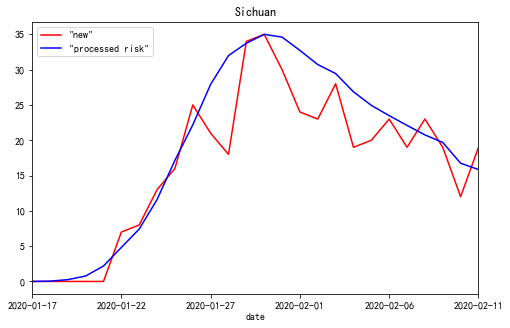

In [52]:
analyzer.plot_move_inc_corr('Sichuan', use_best_fit=True)

offset = 0, window = 1, corr = 0.5388671212412173


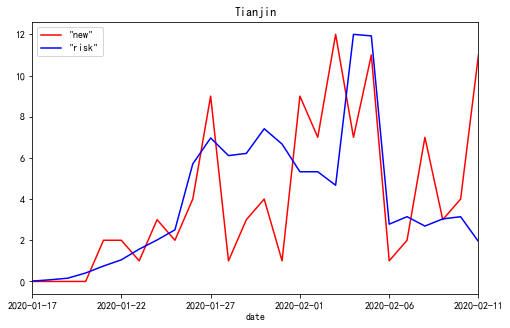

In [53]:
analyzer.plot_move_inc_corr('Tianjin', use_best_fit=False)

offset = 6, window = 2, corr = 0.6314812676604681


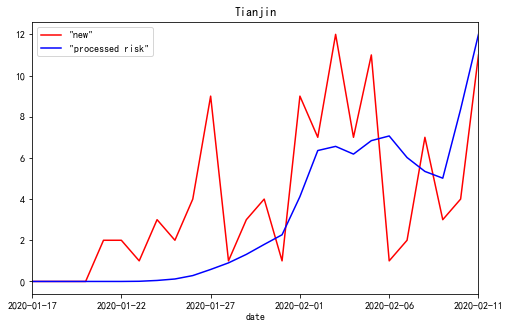

In [54]:
analyzer.plot_move_inc_corr('Tianjin', use_best_fit=True)

offset = 0, window = 1, corr = 0.5405523215503308


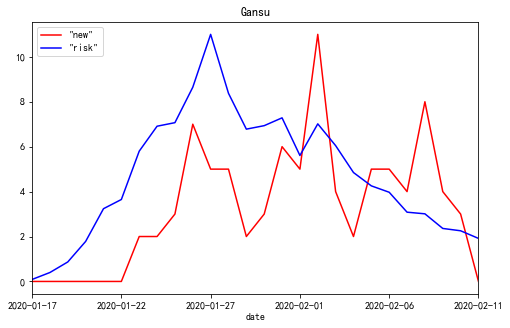

In [55]:
analyzer.plot_move_inc_corr('Gansu', use_best_fit=False)

offset = 0, window = 8, corr = 0.7123331825366783


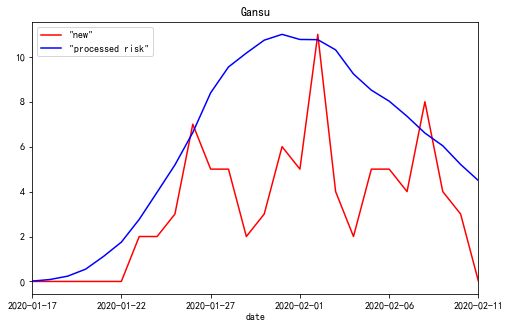

In [56]:
analyzer.plot_move_inc_corr('Gansu', use_best_fit=True)

offset = 0, window = 1, corr = 0.5260691650587502


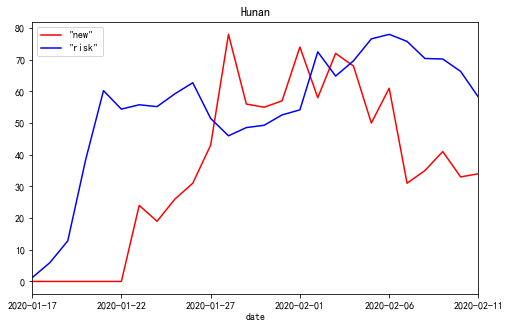

In [57]:
analyzer.plot_move_inc_corr('Hunan', use_best_fit=False)

offset = 7, window = 1, corr = 0.7972037271072374


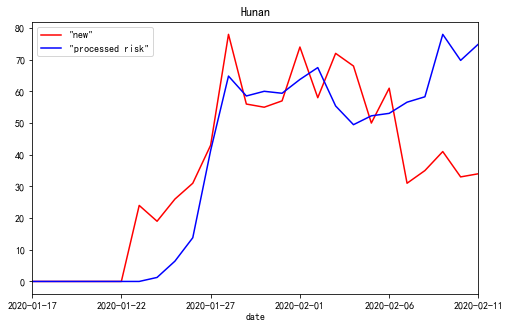

In [58]:
analyzer.plot_move_inc_corr('Hunan', use_best_fit=True)

offset = 0, window = 1, corr = 0.6844593863310701


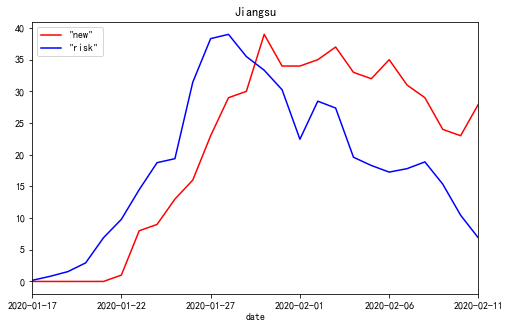

In [59]:
analyzer.plot_move_inc_corr('Jiangsu', use_best_fit=False)

offset = 0, window = 9, corr = 0.9787517969771452


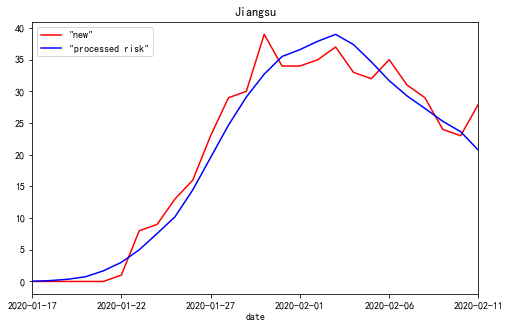

In [60]:
analyzer.plot_move_inc_corr('Jiangsu', use_best_fit=True)

offset = 0, window = 1, corr = 0.17002558252159977


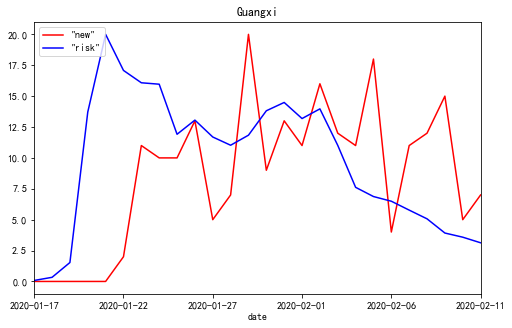

In [61]:
analyzer.plot_move_inc_corr('Guangxi', use_best_fit=False)

offset = 1, window = 9, corr = 0.7762350832933463


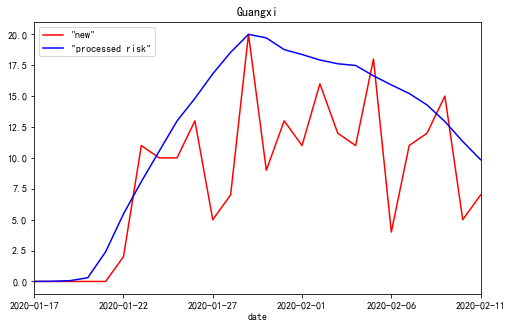

In [62]:
analyzer.plot_move_inc_corr('Guangxi', use_best_fit=True)

offset = 0, window = 1, corr = 0.5215755371313396


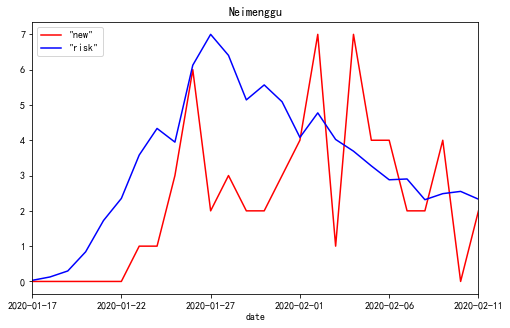

In [63]:
analyzer.plot_move_inc_corr('Neimenggu', use_best_fit=False)

offset = 0, window = 10, corr = 0.6669619051316951


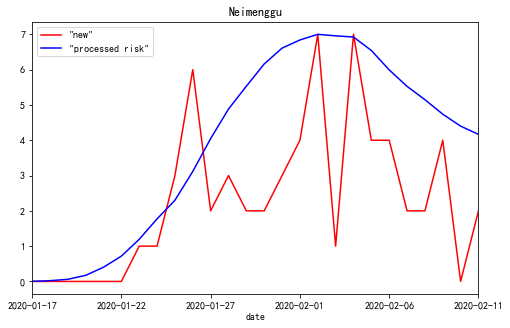

In [64]:
analyzer.plot_move_inc_corr('Neimenggu', use_best_fit=True)

offset = 0, window = 1, corr = 0.4699166674750525


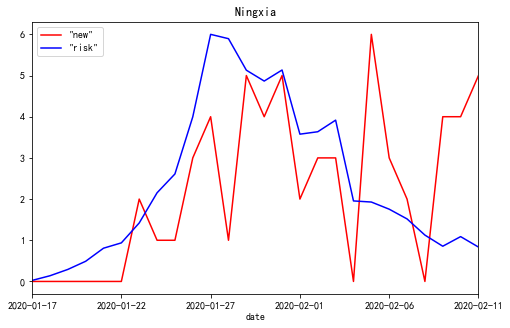

In [65]:
analyzer.plot_move_inc_corr('Ningxia', use_best_fit=False)

offset = 2, window = 2, corr = 0.5769807688191106


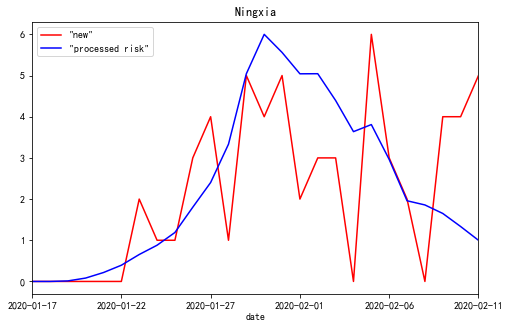

In [66]:
analyzer.plot_move_inc_corr('Ningxia', use_best_fit=True)

offset = 0, window = 1, corr = 0.49873127781405435


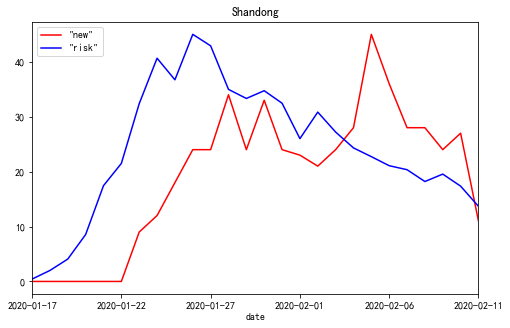

In [67]:
analyzer.plot_move_inc_corr('Shandong', use_best_fit=False)

offset = 0, window = 10, corr = 0.8683701390787155


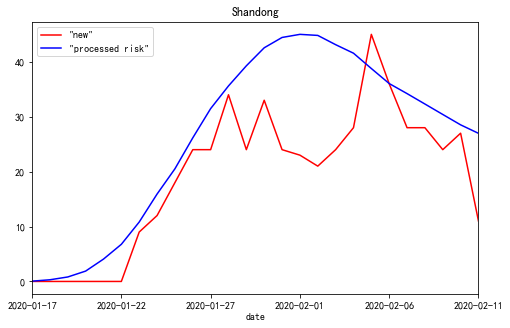

In [68]:
analyzer.plot_move_inc_corr('Shandong', use_best_fit=True)

offset = 0, window = 1, corr = 0.321505539480881


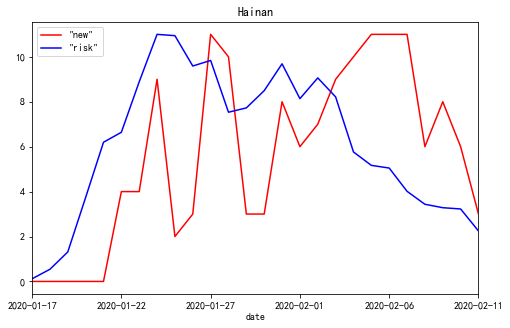

In [69]:
analyzer.plot_move_inc_corr('Hainan', use_best_fit=False)

offset = 1, window = 10, corr = 0.722189099013955


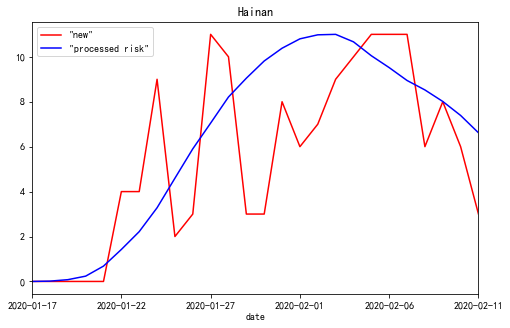

In [70]:
analyzer.plot_move_inc_corr('Hainan', use_best_fit=True)

offset = 0, window = 1, corr = 0.19158500503824055


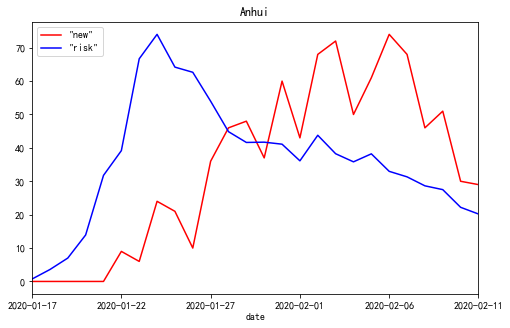

In [71]:
analyzer.plot_move_inc_corr('Anhui', use_best_fit=False)

offset = 3, window = 10, corr = 0.9213411181027489


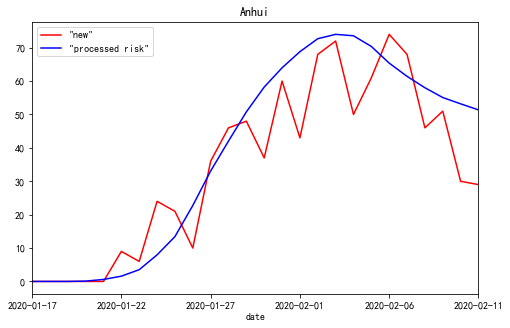

In [72]:
analyzer.plot_move_inc_corr('Anhui', use_best_fit=True)

offset = 0, window = 1, corr = -0.0451381321405444


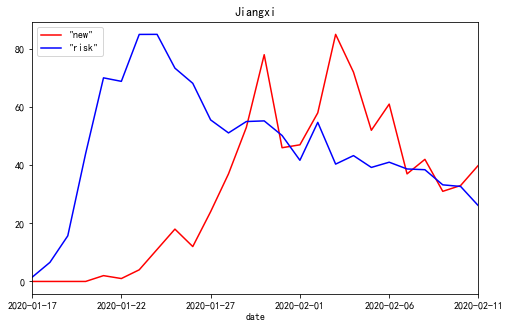

In [73]:
analyzer.plot_move_inc_corr('Jiangxi', use_best_fit=False)

offset = 4, window = 9, corr = 0.9266590397317811


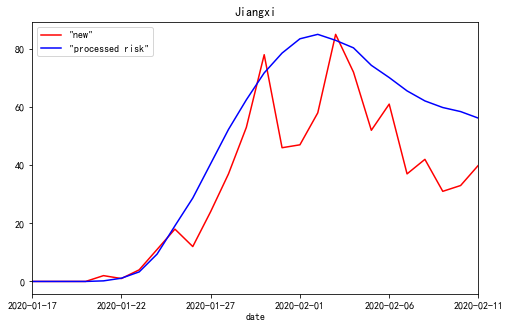

In [74]:
analyzer.plot_move_inc_corr('Jiangxi', use_best_fit=True)

offset = 0, window = 1, corr = 0.427097620580034


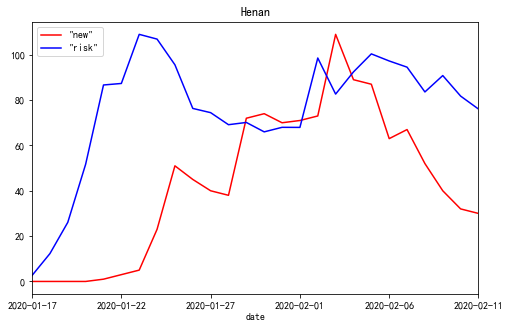

In [75]:
analyzer.plot_move_inc_corr('Henan', use_best_fit=False)

offset = 3, window = 10, corr = 0.832146526828929


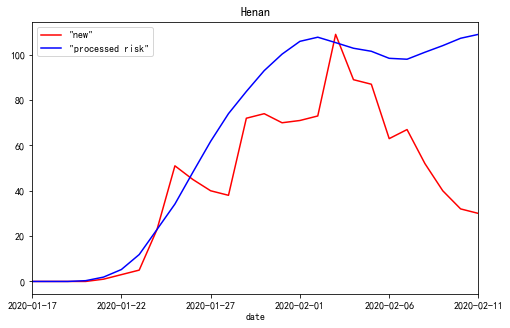

In [76]:
analyzer.plot_move_inc_corr('Henan', use_best_fit=True)

offset = 0, window = 1, corr = -0.013975407137106616


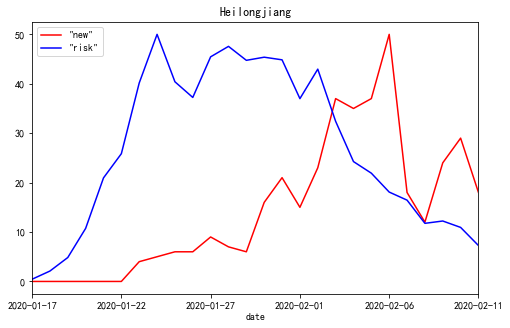

In [77]:
analyzer.plot_move_inc_corr('Heilongjiang', use_best_fit=False)

offset = 4, window = 10, corr = 0.874190948725279


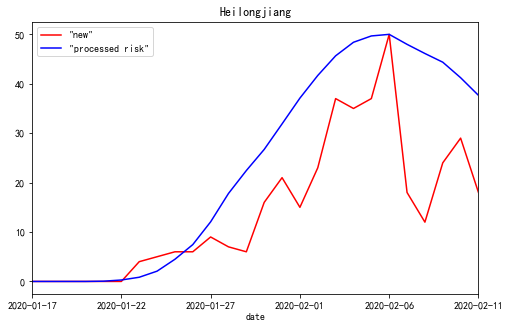

In [78]:
analyzer.plot_move_inc_corr('Heilongjiang', use_best_fit=True)

offset = 0, window = 1, corr = 0.24886375322144283


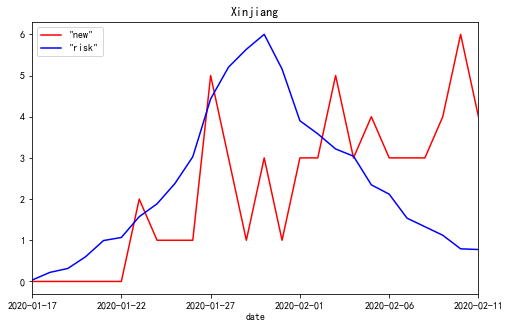

In [79]:
analyzer.plot_move_inc_corr('Xinjiang', use_best_fit=False)

offset = 4, window = 10, corr = 0.7371702807900217


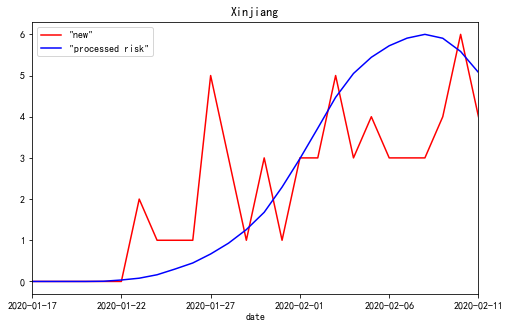

In [80]:
analyzer.plot_move_inc_corr('Xinjiang', use_best_fit=True)

offset = 0, window = 1, corr = -0.10250522909665366


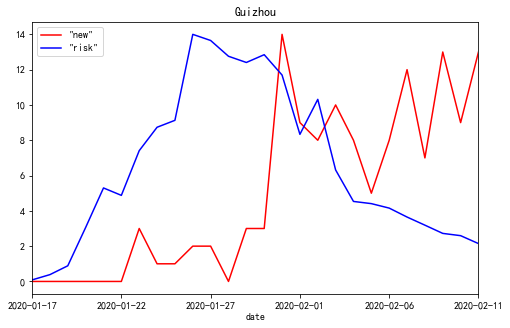

In [81]:
analyzer.plot_move_inc_corr('Guizhou', use_best_fit=False)

offset = 5, window = 10, corr = 0.8357913006722355


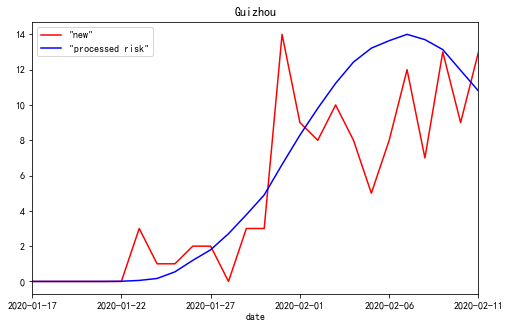

In [82]:
analyzer.plot_move_inc_corr('Guizhou', use_best_fit=True)